In [ ]:
pip install torch torchvision transformers diffusers accelerate safetensors matplotlib pillow


In [ ]:
!pip install --upgrade tensorflow keras
from tensorflow.keras.models import load_model

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 65.6 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: keras
    Found existing installation: keras 3.8.0
    Uninstalling keras-3.8.0:
      Successfully uninstalled keras-3.8.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolve

 Vérification de l'environnement...
TensorFlow version: 2.19.0
GPU disponible: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

 Tentative de chargement avec GPU...
 Modèle chargé sur CPU

 Prédiction en cours...


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


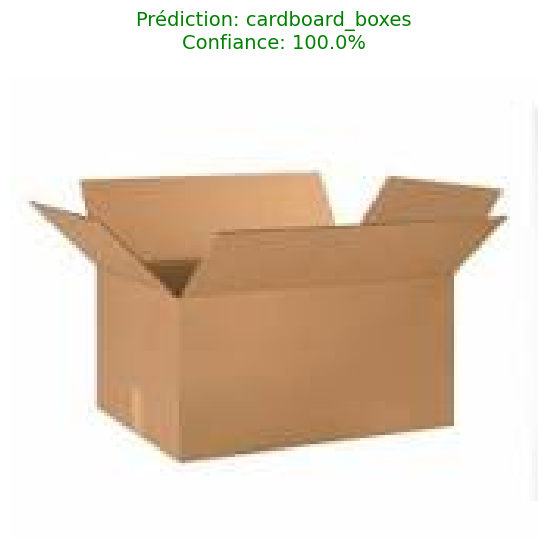

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# 1. Vérification de l'environnement
print(" Vérification de l'environnement...")
print(f"TensorFlow version: {tf.__version__}")
print("GPU disponible:", tf.config.list_physical_devices('GPU'))

# 2. Configuration
MODEL_PATH = 'efficient1waste15.keras'
IMAGE_PATH = 'box.jfif'
CLASS_NAMES =['aerosol_cans', 'aluminum_food_cans', 'aluminum_soda_cans', 'cardboard_boxes', 'clothing', 'food_waste', 'glass_beverage_bottles', 'glass_cosmetic_containers', 'office_paper', 'paper_cups', 'plastic_detergent_bottles', 'plastic_shopping_bags', 'plastic_soda_bottles', 'plastic_straws', 'plastic_water_bottles']




# 3. Chargement spécial du modèle avec contournement GPU si nécessaire
try:
    # Option 1: Essai avec GPU
    print("\n Tentative de chargement avec GPU...")
    model = tf.keras.models.load_model(MODEL_PATH, compile=False)

    # Option 2: Si échec, forcer le CPU
    try:
        with tf.device('/CPU:0'):
            model = tf.keras.models.load_model(MODEL_PATH, compile=False)
        print(" Modèle chargé sur CPU")
    except Exception as e:
        print(f"Échec du chargement: {str(e)}")
        raise

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

    # 4. Préparation de l'image (méthode robuste)
    def prepare_image(img_path):
        img = image.load_img(img_path, target_size=(256, 256))
        img_array = image.img_to_array(img)

        # Essai avec différentes méthodes de normalisation
        for method in ['efficientnet', 'standard']:
            try:
                if method == 'efficientnet':
                    from tensorflow.keras.applications.efficientnet import preprocess_input
                    img_processed = preprocess_input(img_array.copy())
                else:
                    img_processed = img_array / 255.0

                return np.expand_dims(img_processed, axis=0)
            except:
                continue
        return np.expand_dims(img_array / 255.0, axis=0)

    img_ready = prepare_image(IMAGE_PATH)

    # 5. Prédiction
    print("\n Prédiction en cours...")
    with tf.device('/CPU:0'):  # Forcer le CPU pour la prédiction
        preds = model.predict(img_ready)[0]

    # 6. Affichage des résultats
    pred_class = CLASS_NAMES[np.argmax(preds)]
    confidence = np.max(preds)

    plt.figure(figsize=(10, 6))
    plt.imshow(image.load_img(IMAGE_PATH))
    plt.axis('off')
    plt.title(f"Prédiction: {pred_class}\nConfiance: {confidence:.1%}",
              color='green' if confidence > 0.7 else 'orange',
              fontsize=14, pad=20)
    plt.show()



except Exception as e:
    print(f"\n ERREUR CRITIQUE: {str(e)}")
    print("\nPROCÉDURE DE DÉPANNAGE COMPLÈTE:")
    print("1. Redémarrez le runtime (Runtime → Redémarrer le runtime)")
    print("2. Exécutez ces commandes dans une nouvelle cellule:")
    print("   !pip uninstall -y tensorflow keras")
    print("   !pip install tensorflow==2.12.0")
    print("3. Vérifiez que:")
    print("   - Votre modèle est bien nommé 'wasteclasses.keras'")
    print("   - Votre image est dans /content")
    print("4. Réessayez avec cette cellule")

model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

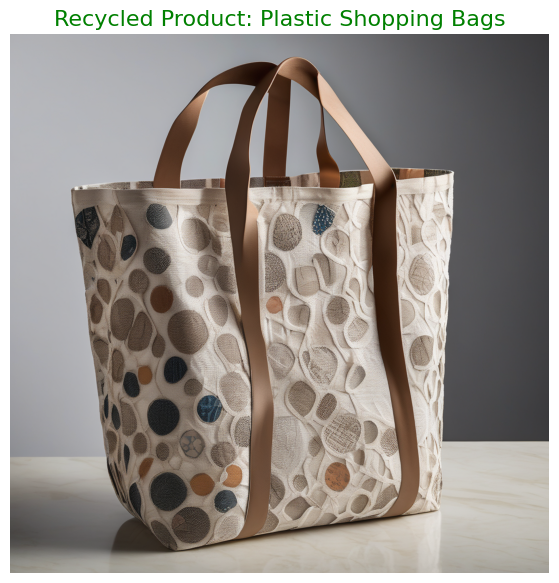

In [ ]:
from diffusers import StableDiffusionXLPipeline
import torch
import matplotlib.pyplot as plt

# Fonction pour obtenir la description du produit recyclé
def get_recycled_product_info(pred_class):
    mapping = {
       "aerosol_cans": "a gardening tool handle created from recycled aerosol cans, metallic and rugged, resting on soil with gardening tools around",
        "aluminum_food_cans": "a set of camping cookware made from recycled aluminum food cans, matte finish, displayed on a rustic wooden table in nature",
        "aluminum_soda_cans": "a sleek bicycle frame crafted from recycled aluminum soda cans, lightweight design, shot outdoors with dynamic sunlight",
        "cardboard_boxes": "an eco-friendly notebook made from recycled cardboard boxes, rough natural texture, placed on a wooden desk with pencils",
        "clothing": "a patchwork blanket made from recycled clothes, colorful squares of fabric, draped over a vintage chair in warm indoor lighting",
        "food_waste": "a pile of nutrient-rich compost made from recycled food waste, dark brown soil texture, surrounded by small healthy plants",
        "glass_beverage_bottles": "a set of drinking glasses made from recycled glass beverage bottles, clear and sleek, arranged on a table with natural lighting",
        "glass_cosmetic_containers": "a decorative vase made from recycled glass cosmetic containers, minimalist design, placed on a white shelf",
        "office_paper": "a stylish notebook made from recycled office paper, sleek design with a leather cover, placed on a desk with a pen and laptop",
        "paper_cups": "a set of eco-friendly paper cups made from recycled paper, stacked neatly on a wooden table with a few open books",
        "plastic_detergent_bottles": "a colorful bench made from recycled plastic detergent containers, glossy finish, placed in a modern public park setting",
        "plastic_shopping_bags": "a durable tote bag made from fused plastic shopping bags, textured surface with abstract patterns, placed on a neutral table with soft lighting",
        "plastic_soda_bottles": "a sports jersey made from recycled soda bottles, breathable mesh texture, hanging on a hanger in a minimalistic locker room",
        "plastic_straws": "a creative lampshade made from recycled plastic straws, geometric design with vivid colors, glowing softly in a cozy living room corner",
        "plastic_water_bottles": "a reusable shopping bag made from recycled plastic bottles, semi-transparent material, vibrant eco-friendly colors, displayed on a white studio background",
    }
    return mapping.get(pred_class, "a beautifully crafted eco-friendly product made from recycled materials, shot in natural soft lighting")

# Assure-toi que pred_class est défini ailleurs dans ton code
# pred_class = "plastic_soda_bottles"

# Obtenir la description détaillée du produit recyclé
recycled_product_description = get_recycled_product_info(pred_class)

# ✅ Prompt amélioré pour plus de réalisme visuel
prompt = (
    f"High-resolution studio photo of {recycled_product_description}. "
    "Ultra realistic materials, DSLR depth of field, soft shadows, subtle reflections, "
    "high-quality product photography, Canon 85mm lens, smooth background, shot on white."
)

# Optionnel : ajouter un negative prompt (pour éviter les défauts)
negative_prompt = (
    "blurry, distorted, out of frame, watermark, overexposed, unnatural, cartoon, low resolution"
)

# Chargement du pipeline SDXL
pipe = StableDiffusionXLPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32,
    variant="fp16" if torch.cuda.is_available() else None
)
pipe = pipe.to("cuda" if torch.cuda.is_available() else "cpu")

# Génération de l'image
image = pipe(prompt=prompt, negative_prompt=negative_prompt, guidance_scale=9).images[0]

# Affichage du résultat
plt.figure(figsize=(12, 7))
plt.imshow(image)
plt.axis("off")
plt.title(f"Recycled Product: {pred_class.replace('_', ' ').title()}", fontsize=16, color="green")
plt.show()


**api mistral**

In [ ]:
!pip install openai==0.28.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.76.0
    Uninstalling openai-1.76.0:
      Successfully uninstalled openai-1.76.0


🔍 Génération de description...
✅ Description : A cardboard laptop stand made from recycled corrugated cardboard boxes, featuring a sturdy and ergonomic design with a honeycomb texture for stability, a natural brown color, and a compact size (12" x 10" x 6") to save desk space, displayed on a clean white studio background.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (102 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['soft shadows, subtle reflections, high - quality product photography, canon 8 5 mm lens, smooth background, shot on white.']
Token indices sequence length is longer than the specified maximum sequence length for this model (102 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['soft shadows, subtle reflections, high - quality product photography, canon 8 5 mm lens, smooth background, shot on white.']


🎨 Génération de l'image...


  0%|          | 0/50 [00:00<?, ?it/s]

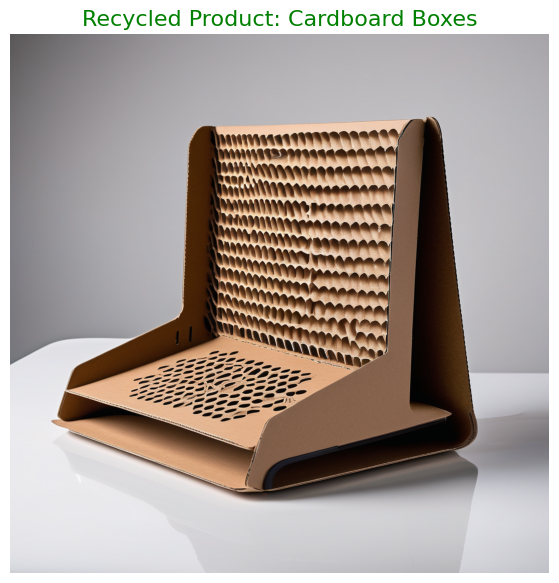

In [ ]:
import openai
from diffusers import StableDiffusionXLPipeline
import torch
import matplotlib.pyplot as plt

# Configuration de l'API Mistral
openai.api_key = ""  # 🔒 Remplace avec ta clé Mistral API
openai.api_base = "https://api.mistral.ai/v1"

# Génération de description via Mistral
def generate_description_with_mistral(pred_class):
    prompt = (
        f"You are a sustainable product designer. Propose one specific, useful and realistic object made only from recycled '{pred_class}'. "
        "Keep the description short and precise, suitable for image generation. The object must be 100% made from that material and usable in daily life. "
        "Include the object's name, what it is used for, key visual features (like size, shape, texture, and color), and how it looks on a studio background. "
        "Output in one single sentence formatted like: "
        "\"a [object] made from recycled [material], [key visual details], shown on a clean white studio background\"."
    )

    response = openai.ChatCompletion.create(
        model="mistral-medium",
        messages=[{"role": "user", "content": prompt}],
        temperature=0.7,
        max_tokens=200
    )

    return response["choices"][0]["message"]["content"].strip()

print("🔍 Génération de description...")
recycled_product_description = generate_description_with_mistral(pred_class)
print("✅ Description :", recycled_product_description)

# Création du prompt complet pour Stable Diffusion
prompt = (
    f"High-resolution studio photo of {recycled_product_description}. "
    "Ultra realistic materials, DSLR depth of field, soft shadows, subtle reflections, "
    "high-quality product photography, Canon 85mm lens, smooth background, shot on white."
)
negative_prompt = (
    "blurry, distorted, out of frame, watermark, overexposed, unnatural, cartoon, low resolution"
)

# Chargement du pipeline Stable Diffusion XL
pipe = StableDiffusionXLPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32,
    variant="fp16" if torch.cuda.is_available() else None
)
pipe = pipe.to("cuda" if torch.cuda.is_available() else "cpu")

# Génération d'image
print("🎨 Génération de l'image...")
image = pipe(prompt=prompt, negative_prompt=negative_prompt, guidance_scale=9).images[0]

# Affichage
plt.figure(figsize=(12, 7))
plt.imshow(image)
plt.axis("off")
plt.title(f"Recycled Product: {pred_class.replace('_', ' ').title()}", fontsize=16, color="green")
plt.show()


**UTILISANT LE NLP**

In [ ]:
!pip install transformers datasets sentencepiece --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 14.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.


In [ ]:
!pip install --upgrade transformers --quiet --no-cache-dir


In [ ]:
import transformers
print(transformers.__version__)


4.51.3


In [ ]:
import pandas as pd
from datasets import Dataset

# Load CSV
df = pd.read_csv("recycled_items_t5_final.csv")

# Rename columns for clarity
df = df.rename(columns={"input": "input_text", "target": "target_text"})

# Make sure it's clean
df = df.dropna()

# Optional: shorten to 1000 examples to speed up first run
df = df.sample(n=200, random_state=42)

# Convert to HuggingFace Dataset
dataset = Dataset.from_pandas(df)
dataset = dataset.train_test_split(test_size=0.1)


In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration, TrainingArguments, Trainer, DataCollatorForSeq2Seq
from transformers import TrainingArguments

model = T5ForConditionalGeneration.from_pretrained("t5-base")
tokenizer = T5Tokenizer.from_pretrained("t5-base")

def preprocess(batch):
    inputs = ["generate description: " + item for item in batch['input_text']]
    model_inputs = tokenizer(inputs, max_length=32, truncation=True, padding="max_length")

    labels = tokenizer(batch['target_text'], max_length=64, truncation=True, padding="max_length")
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

tokenized = dataset.map(preprocess, batched=True)
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

args = TrainingArguments(
    output_dir="t5_finetuned_descriptions",
    do_train=True,
    do_eval=True,
    learning_rate=2e-4,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=10,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    save_total_limit=1,
    save_steps=500,
    eval_steps=500,
)

trainer = Trainer(
    model=model,
    args=args,
    train_dataset=tokenized["train"],
    eval_dataset=tokenized["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
)

trainer.train()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


Map:   0%|          | 0/180 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

<ipython-input-9-89498cbcd693>:34: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: salimmnif123 (salimmnif123-social-security-administration) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Step,Training Loss
10,5.576900
20,0.847900
30,0.533300
40,0.386100
50,0.331800
60,0.272200
70,0.268500
80,0.224100
90,0.203300
100,0.170900


TrainOutput(global_step=230, training_loss=0.4500941421674646, metrics={'train_runtime': 115.2934, 'train_samples_per_second': 15.612, 'train_steps_per_second': 1.995, 'total_flos': 68507762688000.0, 'train_loss': 0.4500941421674646, 'epoch': 10.0})

In [ ]:
model.save_pretrained("t5_finetuned_descriptions")
tokenizer.save_pretrained("t5_finetuned_descriptions")


('t5_finetuned_descriptions/tokenizer_config.json',
 't5_finetuned_descriptions/special_tokens_map.json',
 't5_finetuned_descriptions/spiece.model',
 't5_finetuned_descriptions/added_tokens.json')

In [ ]:
# Import required libraries
import torch
from transformers import T5Tokenizer, T5ForConditionalGeneration

# Load the fine-tuned T5 model
model = T5ForConditionalGeneration.from_pretrained("t5_finetuned_descriptions")
tokenizer = T5Tokenizer.from_pretrained("t5-base")
device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)

# Function to generate high-quality descriptions from a class label
def generate_descriptions(pred_class, num_descriptions=2):
    input_text = "generate description: " + pred_class
    input_ids = tokenizer.encode(input_text, return_tensors="pt").to(model.device)

    outputs = model.generate(
        input_ids=input_ids,
        max_length=64,
        do_sample=True,
        top_k=40,
        top_p=0.92,
        temperature=0.9,
        num_return_sequences=num_descriptions
    )

    descriptions = [tokenizer.decode(output, skip_special_tokens=True) for output in outputs]
    return descriptions


# Generate descriptions
descriptions = generate_descriptions(pred_class)
print(pred_class)
# Print the generated descriptions
for i, description in enumerate(descriptions):
    print(f"Description {i+1}: {description}")


plastic_shopping_bags
Description 1: A colorful wallet crafted from layered recycled shopping bags.
Description 2: A waterproof raincoat stitched from melted plastic bags.


In [ ]:
from transformers import T5ForConditionalGeneration, T5Tokenizer
from sentence_transformers import SentenceTransformer, util
import torch

# Load your fine-tuned T5 model and tokenizer
t5_model = T5ForConditionalGeneration.from_pretrained("t5_finetuned_descriptions")
t5_tokenizer = T5Tokenizer.from_pretrained("t5_finetuned_descriptions")

# Load sentence transformer for semantic similarity
embedder = SentenceTransformer("all-MiniLM-L6-v2")

# Generate product description from waste class
def generate_description(class_name: str, max_input_length=32, max_output_length=64) -> str:
    input_text = class_name
    inputs = t5_tokenizer(input_text, return_tensors="pt", padding="max_length", truncation=True, max_length=max_input_length)

    output = t5_model.generate(
        input_ids=inputs.input_ids,
        attention_mask=inputs.attention_mask,
        max_length=max_output_length,
        num_beams=4,
        early_stopping=True
    )

    return t5_tokenizer.decode(output[0], skip_special_tokens=True)

# Compute semantic alignment between class and description
def score_alignment(class_name: str, description: str) -> float:
    class_prompt = f"product made from recycled {class_name.replace('_', ' ')}"
    embeddings = embedder.encode([class_prompt, description], convert_to_tensor=True)
    similarity = util.pytorch_cos_sim(embeddings[0], embeddings[1])
    return float(similarity)

# Run everything and flag low-confidence outputs
def validate_description(class_name: str, threshold: float = 0.6):
    description = generate_description(class_name)
    score = score_alignment(class_name, description)

    print(f"\nClass: {class_name}")
    print(f"Generated: {description}")
    print(f"Semantic Alignment Score: {score:.3f}")

    if score < threshold:
        print("⚠️  Potential mismatch — check this description.")
    else:
        print("✅  Looks aligned.")

# List of all 15 waste classes
waste_classes = [
    "aerosol_cans", "aluminum_food_cans", "aluminum_soda_cans", "cardboard_boxes", "clothing",
    "food_waste", "glass_beverage_bottles", "glass_cosmetic_containers", "office_paper",
    "paper_cups", "plastic_detergent_bottles", "plastic_shopping_bags", "plastic_soda_bottles",
    "plastic_straws", "plastic_water_bottles"
]

# Run validation for all classes
for waste_class in waste_classes:
    validate_description(waste_class)



Class: aerosol_cans
Generated: A decorative candle holder fashioned from recycled spray cans.
Semantic Alignment Score: 0.561
⚠️  Potential mismatch — check this description.

Class: aluminum_food_cans
Generated: A lightweight camping stove assembled from old aluminum food cans.
Semantic Alignment Score: 0.608
✅  Looks aligned.

Class: aluminum_soda_cans
Generated: A durable picture frame crafted from flattened soda cans.
Semantic Alignment Score: 0.628
✅  Looks aligned.

Class: cardboard_boxes
Generated: A recycled cardboard organizer for storing files and papers.
Semantic Alignment Score: 0.599
⚠️  Potential mismatch — check this description.

Class: clothing
Generated: A stylish wallet handcrafted from reused fabric scraps.
Semantic Alignment Score: 0.525
⚠️  Potential mismatch — check this description.

Class: food_waste
Generated: Fertilizer generated by composting food leftovers.
Semantic Alignment Score: 0.486
⚠️  Potential mismatch — check this description.

Class: glass_bever

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .



Description 1: A waterproof raincoat stitched from melted plastic bags.


  0%|          | 0/50 [00:00<?, ?it/s]


Description 2: A waterproof raincoat stitched from melted plastic bags.


  0%|          | 0/50 [00:00<?, ?it/s]

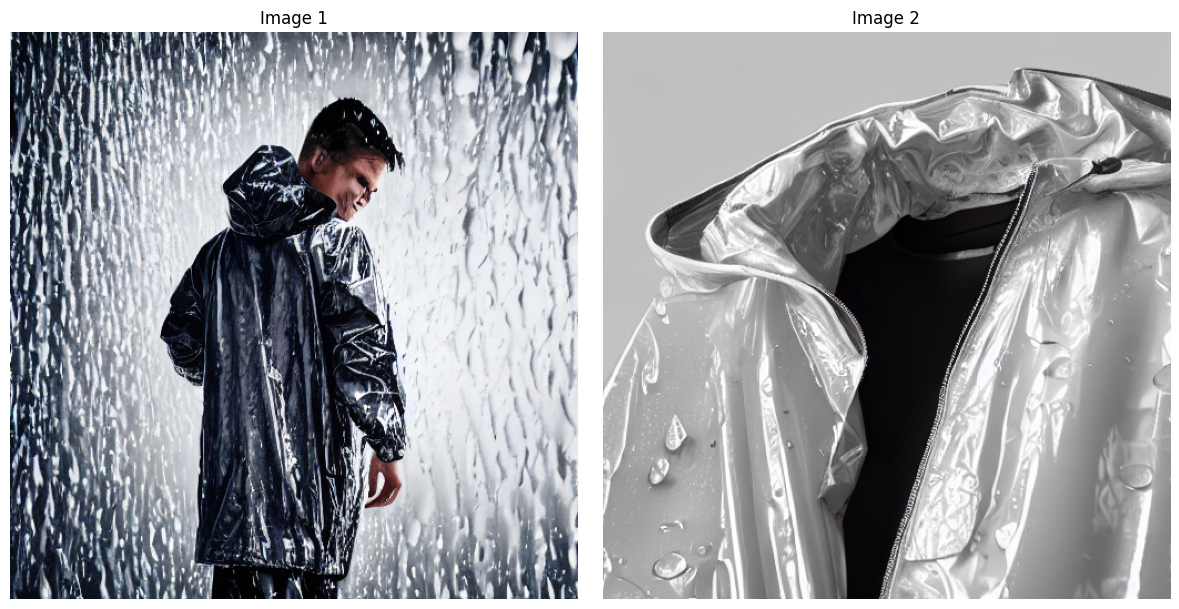

In [ ]:
# Import required libraries
import matplotlib.pyplot as plt
from diffusers import StableDiffusionPipeline
import torch
from transformers import T5Tokenizer, T5ForConditionalGeneration

# Load the fine-tuned T5 model
model = T5ForConditionalGeneration.from_pretrained("t5_finetuned_descriptions")
tokenizer = T5Tokenizer.from_pretrained("t5-small")
device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)

# Load Stable Diffusion model
pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32,
    safety_checker=None
).to(device)

# Function to generate two high-quality descriptions from a class label
def generate_descriptions(pred_class, num_descriptions=2):
    input_text = "generate description: " + pred_class
    input_ids = tokenizer.encode(input_text, return_tensors="pt").to(model.device)

    outputs = model.generate(
        input_ids=input_ids,
        max_length=64,
        do_sample=True,
        top_k=40,
        top_p=0.92,
        temperature=0.7,  # Adjust the temperature for more stable output
        num_return_sequences=num_descriptions
    )

    descriptions = [tokenizer.decode(output, skip_special_tokens=True) for output in outputs]
    return descriptions

# Function to generate images based on generated descriptions
def generate_images_from_descriptions(pred_class):
    descriptions = generate_descriptions(pred_class)
    images = []

    for i, description in enumerate(descriptions):
        print(f"\nDescription {i+1}: {description}")

        prompt = (
            f"Photorealistic studio image of {description}. "
            "Hyper-detailed materials, cinematic lighting, realistic textures, DSLR clarity, "
            "shallow depth of field, clean white background, commercial-grade product photo."
        )

        image = pipe(prompt).images[0]
        images.append(image)

    return images


# Generate and display images from the provided pred_class
images = generate_images_from_descriptions(pred_class)

# Show all generated images using matplotlib
fig, axs = plt.subplots(1, len(images), figsize=(12, 6))
for i, img in enumerate(images):
    axs[i].imshow(img)
    axs[i].axis('off')
    axs[i].set_title(f'Image {i+1}')
plt.tight_layout()
plt.show()


In [ ]:
!pip install -q transformers accelerate


In [ ]:
!pip install openai==0.28


In [ ]:
!pip install transformers
from transformers import pipeline
import random
import json

# Initialize text generation with GPT-2 Medium
generator = pipeline('text-generation', model='gpt2-medium')

# Complete descriptor banks for all 15 classes
MATERIAL_DESCRIPTORS = {
    "aerosol_cans": ["metallic", "industrial-chic", "durable", "rustic metal", "repurposed steel"],
    "aluminum_food_cans": ["matte", "utilitarian", "camp-ready", "functional", "recycled aluminum"],
    "aluminum_soda_cans": ["sleek", "lightweight", "aerospace-grade", "polished", "recycled alloy"],
    "cardboard_boxes": ["rough", "kraft paper", "natural fiber", "unbleached", "corrugated"],
    "clothing": ["patchwork", "upcycled fabric", "colorful", "textured", "vintage-inspired"],
    "food_waste": ["nutrient-rich", "dark", "organic", "crumbly", "fertile"],
    "glass_beverage_bottles": ["crystal-clear", "smooth", "reflective", "translucent", "recycled glass"],
    "glass_cosmetic_containers": ["frosted", "minimalist", "delicate", "sophisticated", "upcycled"],
    "office_paper": ["sleek", "refined", "professional", "textured", "recycled fiber"],
    "paper_cups": ["eco-friendly", "biodegradable", "matte finish", "natural", "compostable"],
    "plastic_detergent_bottles": ["colorful", "high-density", "glossy", "durable", "repurposed"],
    "plastic_shopping_bags": ["fused", "textured", "abstract pattern", "water-resistant", "upcycled"],
    "plastic_soda_bottles": ["breathable", "mesh-like", "sporty", "moisture-wicking", "recycled PET"],
    "plastic_straws": ["geometric", "translucent", "vibrant", "interlocking", "upcycled"],
    "plastic_water_bottles": ["semi-transparent", "eco-chic", "reprocessed", "flexible", "recycled"]
}

PRODUCT_TYPES = {
    "aerosol_cans": ["gardening tools", "furniture legs", "sculptures", "hardware components", "bike parts"],
    "aluminum_food_cans": ["cookware sets", "camping gear", "storage containers", "DIY projects", "utensils"],
    "aluminum_soda_cans": ["bicycle frames", "sporting equipment", "laptop casings", "art installations", "vehicle parts"],
    "cardboard_boxes": ["notebooks", "storage organizers", "furniture", "packaging", "art supplies"],
    "clothing": ["blankets", "tote bags", "quilts", "rugs", "fashion accessories"],
    "food_waste": ["compost piles", "plant nutrients", "soil amendments", "fertilizer", "mushroom substrate"],
    "glass_beverage_bottles": ["drinking glasses", "decanters", "light fixtures", "tile mosaics", "servingware"],
    "glass_cosmetic_containers": ["vases", "candle holders", "makeup brush organizers", "terrariums", "jewelry displays"],
    "office_paper": ["notebooks", "stationery", "art pieces", "gift wrap", "paper mache"],
    "paper_cups": ["new paper products", "planters", "craft materials", "packing filler", "art canvases"],
    "plastic_detergent_bottles": ["outdoor furniture", "playground equipment", "storage bins", "garden planters", "construction materials"],
    "plastic_shopping_bags": ["tote bags", "raincoats", "upholstery", "art canvases", "beach gear"],
    "plastic_soda_bottles": ["sportswear", "backpacks", "carpet fibers", "sleeping bags", "upholstery filling"],
    "plastic_straws": ["lampshades", "room dividers", "wall art", "jewelry", "3D printer filament"],
    "plastic_water_bottles": ["shopping bags", "yoga mats", "outdoor gear", "fleece clothing", "furniture"]
}

SETTINGS = {
    "outdoor": ["in a lush garden", "at a campsite", "on a hiking trail", "in an urban park", "by the beach"],
    "indoor": ["on a wooden desk", "in a cozy living room", "in a modern loft", "on a bookshelf", "in a sunlit kitchen"],
    "commercial": ["in an eco-friendly store", "at a sustainability expo", "in a co-working space", "in a boutique hotel", "at a design studio"],
    "industrial": ["in a recycling facility", "at a maker space", "in an upcycling workshop", "in a design lab", "at a manufacturing plant"]
}

STYLES = ["minimalist", "bohemian", "industrial", "scandinavian", "modern", "rustic", "vintage", "futuristic"]

def generate_description(waste_class):
    # Select random components
    material = random.choice(MATERIAL_DESCRIPTORS[waste_class])
    product = random.choice(PRODUCT_TYPES[waste_class])
    style = random.choice(STYLES)
    setting_type = random.choice(["outdoor", "indoor", "commercial", "industrial"])
    environment = random.choice(SETTINGS[setting_type])

    # Dynamic prompt templates
    templates = [
        f"A {style} {product} made from {waste_class.replace('_', ' ')}, {material} finish, {environment}:",
        f"Transformed {waste_class.replace('_', ' ')} become {product} with {material} texture in {style} style, {environment}:",
        f"An innovative {product} crafted from {waste_class.replace('_', ' ')}, featuring {material} surfaces, {environment}:",
        f"{style.capitalize()} {product} created from recycled {waste_class.replace('_', ' ')}, {material} details, {environment}:"
    ]

    prompt = random.choice(templates)

    # Generate description
    output = generator(
        prompt,
        max_length=80,
        num_return_sequences=1,
        temperature=0.9,
        top_p=0.9,
        repetition_penalty=1.1,
        do_sample=True
    )[0]['generated_text']

    # Clean and format
    description = output.replace(prompt, "").split(".")[0].strip() + "."
    return {waste_class: description}

# Generate descriptions for all classes
def generate_all_descriptions():
    results = {}
    waste_classes = [
        "aerosol_cans", "aluminum_food_cans", "aluminum_soda_cans",
        "cardboard_boxes", "clothing", "food_waste", "glass_beverage_bottles",
        "glass_cosmetic_containers", "office_paper", "paper_cups",
        "plastic_detergent_bottles", "plastic_shopping_bags",
        "plastic_soda_bottles", "plastic_straws", "plastic_water_bottles"
    ]

    for waste in waste_classes:
        results.update(generate_description(waste))

    return results

# Generate and output
descriptions = generate_all_descriptions()

# Save to JSON
with open('recycled_product_descriptions.json', 'w') as f:
    json.dump(descriptions, f, indent=2)

# Print sample output
print("Sample Generated Descriptions:")
for waste, desc in descriptions.items():
    print(f"{waste.replace('_', ' ').title()}: {desc}")

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to 

Sample Generated Descriptions:
Aerosol Cans: https://t.
Aluminum Food Cans: "What It Does"
The Bricks for Life project is an effort to take up space at the recycling center by reusing brick-made structures with metal frames.
Aluminum Soda Cans: This frame will surely become a hit among cycling enthusiasts and cyclists alike.
Cardboard Boxes: we are creating new forms of paper and providing them with unique textures that make their creation special and intriguing.
Clothing: .
Food Waste: A fully functional 'home' with its own kitchen and bathroom!
 to be published on May 9th.
Glass Beverage Bottles: .
Glass Cosmetic Containers: This is one of my favourite designs that I've ever made.
Office Paper: Tiered coffee table becomes the centerpiece of an elegant décor design for "Haus" (Café and Eatery) by Kallista Architects.
Paper Cups: I used to go out and buy some of these things at the mall.
Plastic Detergent Bottles: it's not exactly your typical office chair.
Plastic Shopping Bags: "I lo

In [ ]:
import matplotlib.pyplot as plt
from diffusers import StableDiffusionPipeline
import torch
import requests

# --- Charger Stable Diffusion ---
device = "cuda" if torch.cuda.is_available() else "cpu"

pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32,
    safety_checker=None
).to(device)

# --- Fonction pour appeler l'API Llama ---
def generate_descriptions_llama(pred_class, num_descriptions=2):
    llama_api_url = "https://api-inference.huggingface.co/models/meta-llama/Llama-2-7b-chat-hf"
  # <-- Remplace ici par ton API URL
    headers = {
        "Authorization": "",  # <-- Mets ici ton token Hugging Face
        "Content-Type": "application/json"
    }
    prompt_text = (
        f"Imagine deux objets créés après recyclage du matériau suivant : '{pred_class}'. "
        "Génère des idées créatives et précises sur ce que ce matériau peut devenir après recyclage."
    )
    payload = {
        "inputs": prompt_text,
        "parameters": {
            "temperature": 0.7,
            "top_p": 0.9,
            "num_return_sequences": num_descriptions,
            "max_length": 100
        }
    }

    response = requests.post(llama_api_url, headers=headers, json=payload)
    response.raise_for_status()
    outputs = response.json()

    # Vérification de la structure de la réponse
    descriptions = [choice["generated_text"].strip() for choice in outputs["choices"]]
    return descriptions

# --- Générer des images ---
def generate_images_from_descriptions(pred_class):
    descriptions = generate_descriptions_llama(pred_class)
    images = []

    for i, description in enumerate(descriptions):
        print(f"\nDescription {i+1}: {description}")

        prompt = (
            f"Photorealistic, hyper-detailed studio image of {description}. "
            "Ultra-realistic textures, high-definition clarity, cinematic lighting, vivid colors, "
            "deep focus, soft shadows, soft lighting, professional-grade photography with a clean white background."
        )

        # Stable Diffusion generation
        image = pipe(prompt, num_inference_steps=50, guidance_scale=12.5).images[0]
        images.append(image)

    return images

# --- Exemple d'utilisation ---
images = generate_images_from_descriptions(pred_class)

# --- Afficher les images ---
fig, axs = plt.subplots(1, len(images), figsize=(12, 6))
for i, img in enumerate(images):
    axs[i].imshow(img)
    axs[i].axis('off')
    axs[i].set_title(f'Image {i+1}')
plt.tight_layout()
plt.show()


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


HTTPError: 403 Client Error: Forbidden for url: https://api-inference.huggingface.co/models/meta-llama/Llama-2-7b-chat-hf